## Purpose

The data analysis and prediction here is about an Airline Passenger Satisfaction. We will go through several aspects like Class, Delays, Time convenience, On-board services etc. We are using here classification and regrassion method for our calculations. The calculations are for how much the experience is satisfiable.

 ** The dataset is taken from kaggle

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np

# for regression and classification models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# for predictions and other calculations
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

# for graph plotting
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data exploration

In [2]:
data1=pd.read_csv('airline_passenger_satisfaction.csv') # read csv file
data1.head(5) # display csv file data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Female,28,First-time,Business,Business,821,0,5.0,1,...,2,2,5,2,2,4,1,2,3,Neutral or Dissatisfied
1,2,Female,27,First-time,Business,Business,421,20,21.0,2,...,2,2,5,1,1,3,1,1,4,Neutral or Dissatisfied
2,3,Male,24,First-time,Business,Economy,453,16,30.0,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied
3,4,Male,9,Returning,Personal,Business,853,68,76.0,5,...,4,5,3,5,5,5,1,5,4,Neutral or Dissatisfied
4,5,Male,52,Returning,Personal,Economy,853,0,0.0,4,...,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied


In [3]:
data1.info() # display dtypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      934 non-null    int64  
 1   Gender                                  934 non-null    object 
 2   Age                                     934 non-null    int64  
 3   Customer Type                           934 non-null    object 
 4   Type of Travel                          934 non-null    object 
 5   Class                                   934 non-null    object 
 6   Flight Distance                         934 non-null    int64  
 7   Departure Delay                         934 non-null    int64  
 8   Arrival Delay                           932 non-null    float64
 9   Departure and Arrival Time Convenience  934 non-null    int64  
 10  Ease of Online Booking                  934 non-null    int64 

In [4]:
data1.shape #size of the dataset

(934, 24)

In [5]:
data = data1.loc[:, data1.columns != "ID"] #removing ID from the dataset as we do not want it in any evaluation

In [6]:
data.corr() #finding correlation between different features of the dataset

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.000000,0.216008,-0.029652,-0.040105,0.031417,0.004101,0.004338,0.308428,0.044775,0.027707,0.209842,0.044784,0.042418,0.033805,-0.148705,-0.039079,0.062830,-0.131806
Flight Distance,0.216008,1.000000,-0.057768,-0.038931,-0.000375,0.003000,0.086513,0.270290,-0.029484,0.061180,0.188149,0.110413,0.066046,0.030652,-0.043875,-0.058316,0.098776,-0.062051
Departure Delay,-0.029652,-0.057768,1.000000,0.958426,-0.008682,-0.006995,-0.062246,-0.058503,-0.020778,-0.027059,-0.066791,0.016690,-0.028138,-0.024378,-0.059180,0.033449,0.012692,0.000014
Arrival Delay,-0.040105,-0.038931,0.958426,1.000000,-0.004838,-0.005526,-0.055716,-0.073451,-0.036250,-0.019774,-0.075650,0.031062,-0.035089,-0.037928,-0.052098,0.031633,0.010738,0.001472
Departure and Arrival Time Convenience,0.031417,-0.000375,-0.008682,-0.004838,1.000000,0.479198,0.022814,0.069611,0.504231,0.006908,0.052516,0.018260,0.011368,0.031963,0.032906,0.421659,0.025440,-0.013038
Ease of Online Booking,0.004101,0.003000,-0.006995,-0.005526,0.479198,1.000000,-0.051033,0.224112,0.487505,0.103195,0.003446,0.161333,-0.056613,0.009852,0.102991,0.800636,0.100325,0.118655
Check-in Service,0.004338,0.086513,-0.062246,-0.055716,0.022814,-0.051033,1.000000,0.279410,-0.101119,0.352676,0.248087,0.304364,0.257819,0.145162,0.325766,0.051365,0.270946,0.335552
Online Boarding,0.308428,0.270290,-0.058503,-0.073451,0.069611,0.224112,0.279410,1.000000,0.000809,0.268894,0.482028,0.262504,0.339048,0.186269,0.132191,0.236017,0.337029,0.143646
Gate Location,0.044775,-0.029484,-0.020778,-0.036250,0.504231,0.487505,-0.101119,0.000809,1.000000,-0.063990,0.028807,0.013241,0.019967,0.054027,-0.015827,0.402864,0.008335,-0.019373
On-board Service,0.027707,0.061180,-0.027059,-0.019774,0.006908,0.103195,0.352676,0.268894,-0.063990,1.000000,0.221193,0.638850,0.200740,0.078392,0.784765,0.238530,0.630501,0.667915


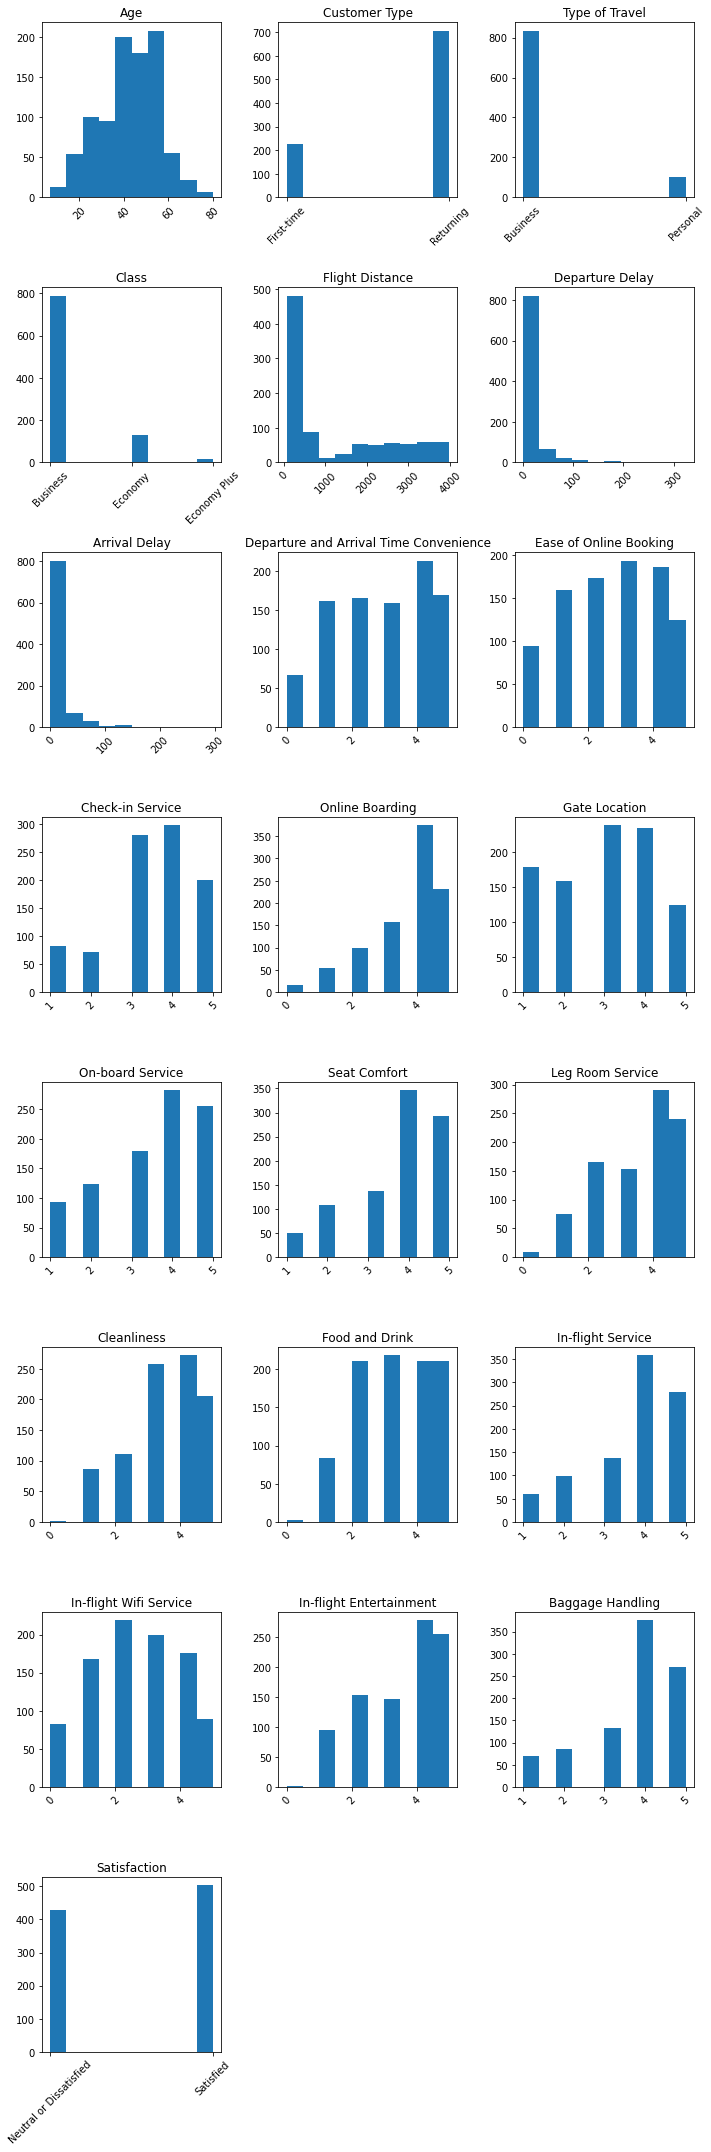

In [7]:
# Bar plotting for different features
cols = list(data.columns)
cols_df=cols[1:]
plt.figure(figsize=(10,30))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=45)
    plt.hist(data[cols_df[i]])
    
plt.tight_layout()

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

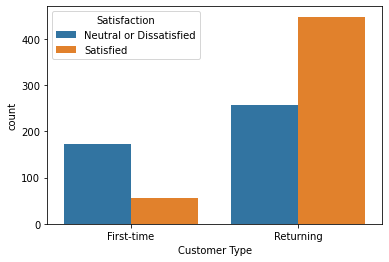

In [8]:
# We can see the customer satisfaction ratios in the bar graph below
sns.countplot(data=data, x= 'Customer Type', hue= 'Satisfaction')

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

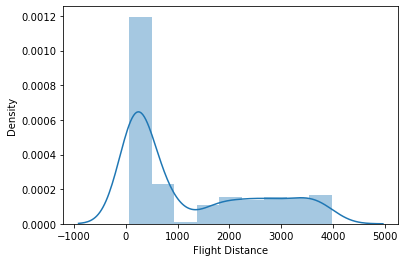

In [9]:
sns.distplot(data["Flight Distance"])

<AxesSubplot:xlabel='Arrival Delay', ylabel='Density'>

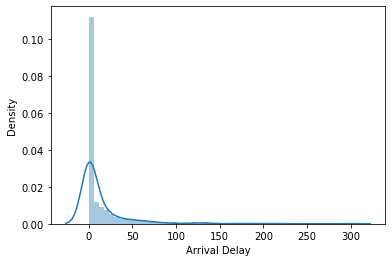

In [10]:
sns.distplot(data["Arrival Delay"])

<AxesSubplot:xlabel='Departure Delay', ylabel='Density'>

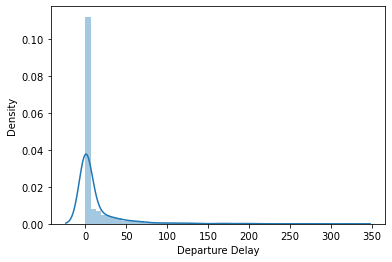

In [11]:
sns.distplot(data["Departure Delay"])

## Data preparation

In [12]:
data.isnull().sum() # check if any null data

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             2
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [13]:
data.dropna() # dropping null values

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Female,28,First-time,Business,Business,821,0,5.0,1,1,...,2,2,5,2,2,4,1,2,3,Neutral or Dissatisfied
1,Female,27,First-time,Business,Business,421,20,21.0,2,2,...,2,2,5,1,1,3,1,1,4,Neutral or Dissatisfied
2,Male,24,First-time,Business,Economy,453,16,30.0,2,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied
3,Male,9,Returning,Personal,Business,853,68,76.0,5,1,...,4,5,3,5,5,5,1,5,4,Neutral or Dissatisfied
4,Male,52,Returning,Personal,Economy,853,0,0.0,4,2,...,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,Female,21,First-time,Business,Economy,309,0,0.0,2,1,...,2,2,3,2,2,3,1,2,4,Neutral or Dissatisfied
930,Female,54,Returning,Business,Business,309,0,0.0,0,0,...,4,2,0,4,3,4,1,4,4,Neutral or Dissatisfied
931,Male,39,Returning,Business,Business,3907,0,0.0,4,4,...,1,2,1,2,4,1,1,1,1,Neutral or Dissatisfied
932,Male,37,First-time,Business,Business,312,0,0.0,4,4,...,4,4,4,4,4,5,5,4,5,Satisfied


Age                                          AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Flight Distance                           AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
Departure Delay                            AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
Arrival Delay                             AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
Departure and Arrival Time Convenience    AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
Ease of Online Booking                       AxesSubplot(0.125,0.703298;0.133621x0.0803191)
Check-in Service                          AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
Online Boarding                            AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
Gate Location                             AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
On-board Service                          AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
Seat Comfort                                 AxesSubplot(0.125,0.606915;0.133621

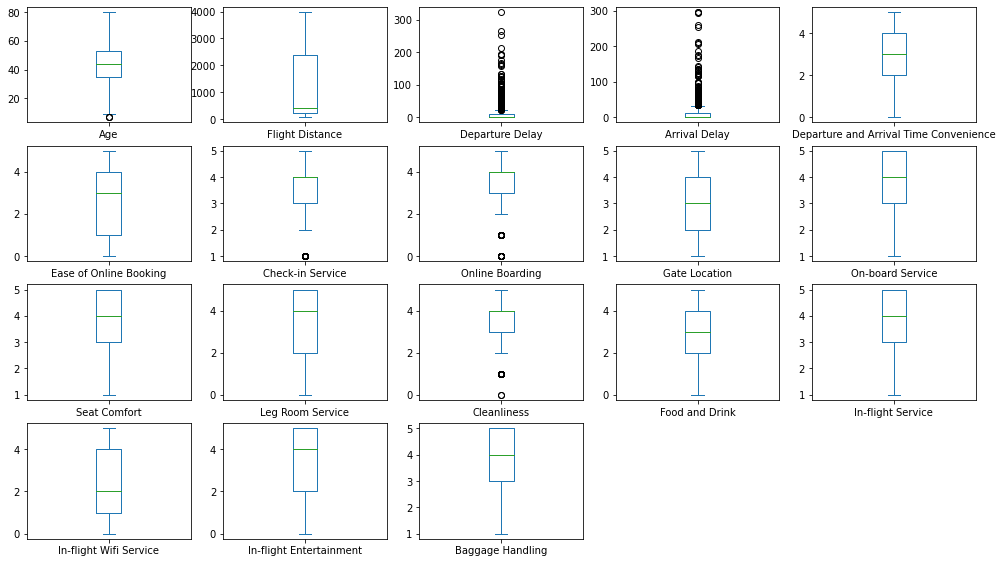

In [14]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20)) #checking outliers

In [15]:
#outliers treatment
data=data[data['Flight Distance']<data['Flight Distance'].quantile(0.9)]
data=data[data['Departure Delay']<data['Departure Delay'].quantile(0.9)]
data=data[data['Arrival Delay']<data['Arrival Delay'].quantile(0.9)]

Age                                          AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Flight Distance                           AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
Departure Delay                            AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
Arrival Delay                             AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
Departure and Arrival Time Convenience    AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
Ease of Online Booking                       AxesSubplot(0.125,0.703298;0.133621x0.0803191)
Check-in Service                          AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
Online Boarding                            AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
Gate Location                             AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
On-board Service                          AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
Seat Comfort                                 AxesSubplot(0.125,0.606915;0.133621

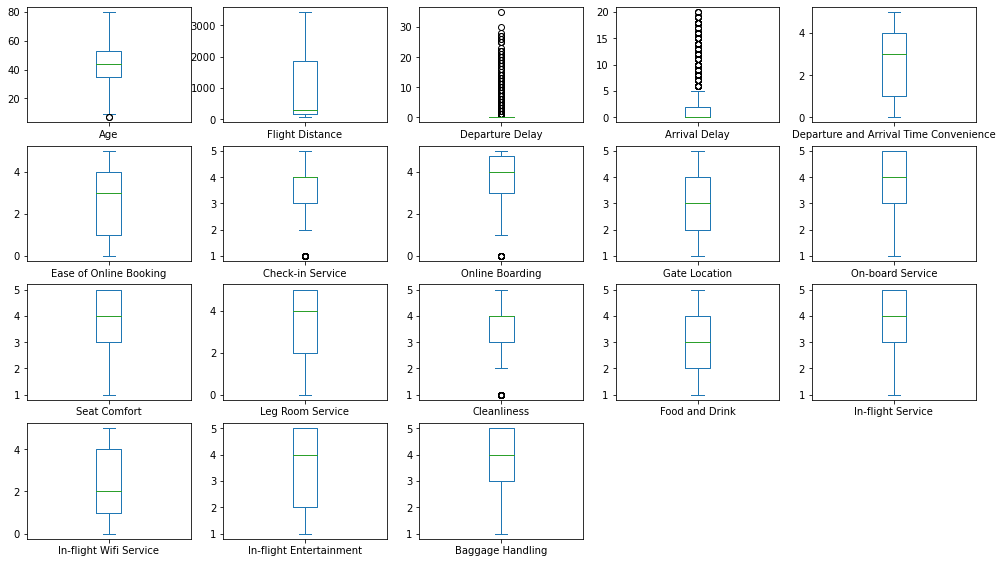

In [16]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [17]:
#Converting data types
data['Gender'] = LabelEncoder().fit_transform(data["Gender"])
data['Customer Type'] = LabelEncoder().fit_transform(data["Customer Type"])
data['Type of Travel'] = LabelEncoder().fit_transform(data["Type of Travel"])
data['Class'] = LabelEncoder().fit_transform(data["Class"])
data['Satisfaction'] = LabelEncoder().fit_transform(data["Satisfaction"])

In [18]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,0,28,0,0,0,821,0,5.0,1,1,...,2,2,5,2,2,4,1,2,3,0
4,1,52,1,1,1,853,0,0.0,4,2,...,3,2,3,2,2,5,2,2,5,0
5,1,70,1,1,1,821,0,0.0,5,2,...,4,5,2,5,5,5,2,5,4,0
6,0,48,1,1,1,821,0,0.0,3,2,...,5,1,2,2,1,5,2,5,5,0
7,0,61,1,1,1,821,0,0.0,5,2,...,5,5,2,1,4,5,2,5,5,0


## Data separation into training and testing sets

In [19]:
x = data.drop("Satisfaction", axis = 1).values
y = data['Satisfaction'].values 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=142) #split the data into 80:20 ratio

In [21]:
x_train.shape #size of x train

(539, 22)

In [22]:
x_test.shape #size of x test

(135, 22)

In [23]:
y_train.shape #size of y train

(539,)

In [24]:
y_test.shape #size of y test

(135,)

## Model evaluation

**Regression models:** Linear regression is used for predicting the continuous dependent variable using a given set of independent features whereas Logistic Regression is used to predict the categorical. Linear regression is used to solve regression problems whereas logistic regression is used to solve classification problems. We have shown here both the models with single datasets.

### Linear Regression

Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables.

In [25]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

predicted = reg.predict(x_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

MSE: 0.014398480699359036
Root MSE: 0.11999366941367796
R Squared: 0.7038612660861936


[Text(0.5, 1.0, 'Linear regression graph')]

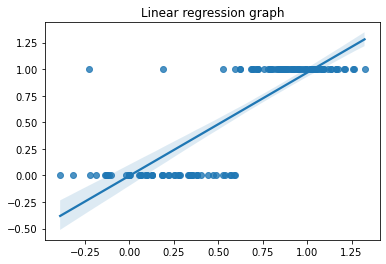

In [26]:
sns.regplot(predicted,y_test).set(title='Linear regression graph') # graph showing linear line

When we train and test on different data the results are slighlty poorer than testing on the full training set but the performance of the model is still good at  𝑅2  of 0.70. The MSE value corresponds to a prediction error of 0.11

### Logistic Regression

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

In [27]:
# training model with all features
lr = LogisticRegression().fit(x_train, y_train)

# making predictions on training and test set
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test))

Acc on training set:  0.8070500927643784
Acc on test set:  0.8148148148148148


**RFE method in Logistic Regression:** Recursive Feature Estimation which removes features one by one, evaluating the model each time and selecting the best model for a target number of features.

*(parameter analysis part from the task covered- automatically prioritizes features and evaluates the model)*

In [28]:
# Logistic regression with RFE method
rfe = linear_model.LogisticRegression(C = 100)
selector = RFE(rfe,n_features_to_select=5,step=1)
selector.fit(x_train,y_train)

RFE(estimator=LogisticRegression(C=100), n_features_to_select=5)

In [29]:
# predict data of RFE model
train_fpredict = selector.predict(x_train)
test_fpredict = selector.predict(x_test)

[Text(0.5, 1.0, 'RFE logistic regression graph')]

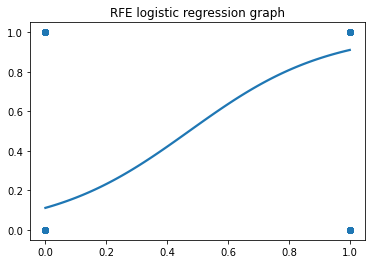

In [30]:
sns.regplot(x=train_fpredict, y=y_train, data=data, logistic=True, ci=None).set(title='RFE logistic regression graph') #graph showing logistic line

**Accuracy score** is used to measure the model performance in terms of measuring the ratio of sum of true positive and true negatives out of all the predictions made. # If we see very less difference between train and test data accuracy score, concludes model is well predicted.

In [31]:
# accuracy score after RFE method
print("Accuracy score:\n")
print("train data after RFE: ", accuracy_score(y_train,train_fpredict))
print("test data after RFE: ", accuracy_score(y_test,test_fpredict))

acc_log = accuracy_score(y_test,test_fpredict)


Accuracy score:

train data after RFE:  0.8998144712430427
test data after RFE:  0.9037037037037037


After seeing accuracy score before and after RFE method in logistic regression, we can say that **RFE** makes logistic regression model more accurate for prediction.

In [32]:
# comparison example of prediction
Y_pred = selector.predict(x_test)
df = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
df.head(10)

,Y_test,Y_pred
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,0,1
7,1,1
8,1,1
9,1,1


A **confusion matrix** visualizes and summarizes the performance of a classification algorithm.

In [33]:
cm = confusion_matrix(y_train, train_fpredict)
cm

array([[231,  25],
       [ 29, 254]], dtype=int64)

[Text(0.5, 1.0, 'confusion matrix heatmap')]

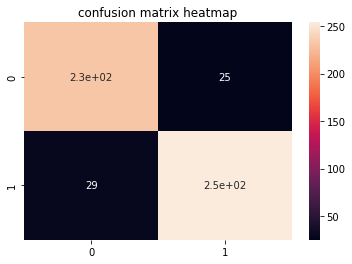

In [34]:
sns.heatmap(cm, annot=True).set(title='confusion matrix heatmap')

The **F1-score** combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers. Suppose that classifier A has a higher recall, and classifier B has higher precision.

In [35]:
# We can see the f1-score which is nearer to 1 is good
print(classification_report(y_train, train_fpredict))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       256
           1       0.91      0.90      0.90       283

    accuracy                           0.90       539
   macro avg       0.90      0.90      0.90       539
weighted avg       0.90      0.90      0.90       539



**AUC-ROC Curve:** The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

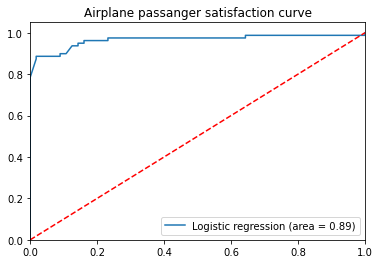

In [36]:
#generating AUC-ROC curve
logit_roc_auc = roc_auc_score(y_test,test_fpredict)
fpr, tpr, thresholds = roc_curve(y_test, selector.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.title('Airplane passanger satisfaction curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The above graph shows the model evaluation is well predictive as it covers area of 0.89 which is nearer to 1.

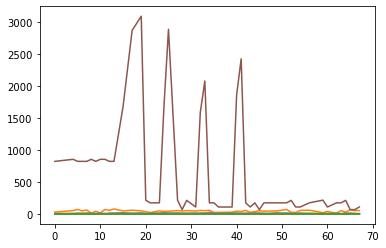

In [37]:
plt.plot(data[:50])

**Classification Algorithms:** In machine learning are that automatically orders or categorizes data into one or more of a set of “classes”.

### K-Nearest Neighbour model:

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

# Use the model to predict testing data
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
acc_knn = accuracy

print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.6222222222222222


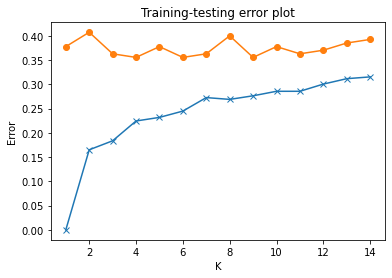

In [39]:
# Plot the accurcy trend w.r.t. K
training_error = list()
testing_error = list()

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    training_error.append(1.0-accuracy_score(knn.predict(x_train), y_train))
    testing_error.append(1.0-accuracy_score(knn.predict(x_test), y_test))
    
#plot the relationship
plt.plot(range(1,15), training_error, marker = 'x') #Training error is shown in blue color line
plt.plot(range(1,15), testing_error, marker = 'o') #Testing error is shown in orange color line
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Training-testing error plot')
#plt.legand(loc='best')
plt.show()


#### Automatic model hyperparameter (algorithm parameter) tuning: 
*(parameter analysis part from the task covered- automatically tunes n_neighbours value for better performance)*

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors

In [40]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
#knn_clf
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
#clff
clf.fit(x_train, y_train)
#acc_knn= clf.score_

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  16
The accuracy:  0.6677847658979734


### Naive Bayes Classifiers

In machine learning, **Naive Bayes classifiers** are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

The model generated confidence score is the lowest among the models evaluated so far.

In [41]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = accuracy_score(Y_pred, y_test)

round(gaussian.score(x_train, y_train) * 100, 2)

88.87

[Text(0.5, 1.0, 'Plot for Gaussian naive-bayes classifiers')]

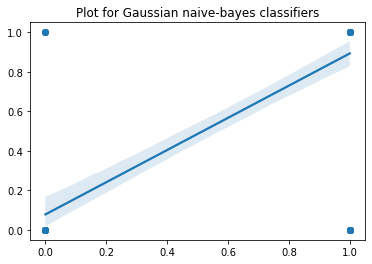

In [42]:
sns.regplot(Y_pred,y_test).set(title='Plot for Gaussian naive-bayes classifiers')

### Support Vector Classifier

SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes

In [43]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [44]:
acc_svc = accuracy_score(svc_model.predict(x_test),y_test)
acc_svc

0.6074074074074074

[Text(0.5, 1.0, 'svc plot')]

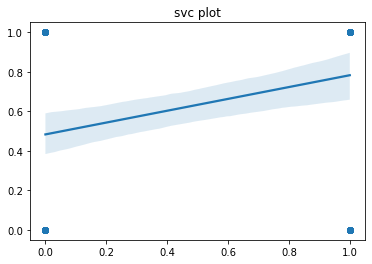

In [45]:
sns.regplot(svc_model.predict(x_test),y_test).set(title='svc plot')

## Final insights

We can now rank our evaluation of all the models to choose the best one for our problem.

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes','KNN','SVC'],
    'Accuracy Score': [acc_log,acc_gaussian,acc_knn,acc_svc]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
0,Logistic Regression,0.903704
1,Naive Bayes,0.903704
2,KNN,0.622222
3,SVC,0.607407


In above comparison, Logistic regression and Naive Bayes algorithms are almost similar in this evaluations then other models, showing the results of passanger satisfaction on their full flight journey as shown in graph before in data exploration part.